In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import pyblock
from scipy.special import logsumexp
from scipy.special import softmax

# matplotlib settings
# --- Publication style settings ---
plt.rcParams.update({
    # Font
    "font.family": "Times New Roman",
    "font.serif": ["Arial"],  # or other preferred serif font
    "mathtext.fontset": "cm",            # Computer Modern for math text
    "text.usetex": False,                 # Use LaTeX for text rendering]
    "pdf.fonttype": 42,                 # Use LaTeX for text rendering

    # Figure
    "figure.figsize": (6, 4),            # width, height in inches
    "figure.dpi": 300,                   # high resolution

    # Axes
    "axes.titlesize": 14,
    "axes.labelsize": 12,
    "axes.linewidth": 1.2,
    "axes.grid": True,                   # optional, remove if you want no grid
    "grid.linestyle": "--",
    "grid.alpha": 0.7,

    # Ticks
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "xtick.direction": "in",
    "ytick.direction": "in",
    "xtick.top": True,
    "ytick.right": True,

    # Lines
    "lines.linewidth": 2,
    "lines.markersize": 6,

    # Legend
    "legend.fontsize": 10,
    "legend.frameon": False
})


output_path = './plots_fragment_ACTR_independent_biases/'
prod_name = '300K'
path = '../OPES_multiT/fragment_helix_ACTR/NEW_PRODUCTION_OPES_multiT_300K_noHMR_otherbiases/alldata/'

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


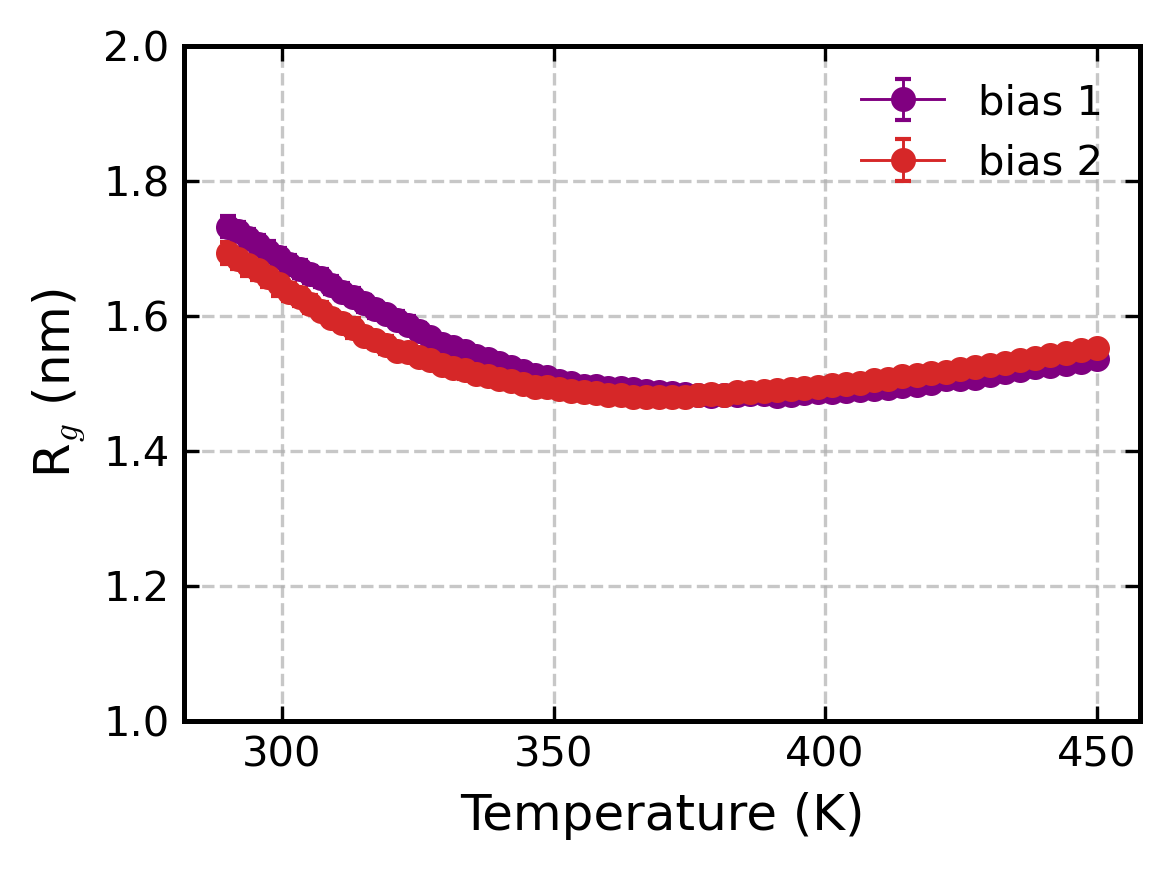

In [2]:
# Rg as a function of temp (avg + std_err) - error obtained by blocking analysis on concatenated dataset


# load data
dfshared = pd.read_csv('plots_fragmentACTR/300K_Rg_vs_Temp.csv')
dfother = pd.read_csv('plots_fragmentACTR_otherbiases/300K_Rg_vs_Temp.csv')

plt.figure(figsize = (4,3))
plt.errorbar(dfshared['T (K)'], dfshared['Rg (nm)'], dfshared['±'], fmt='o-', color = 'purple', capsize = 2, markersize = 5, linewidth=0.7, elinewidth=0.7, label = 'bias 1')
plt.errorbar(dfother['T (K)'], dfother['Rg (nm)'], dfother['±'], fmt='o-', color = 'tab:red', capsize = 2, markersize = 5, linewidth=0.7, elinewidth=0.7, label = 'bias 2')
plt.xlabel('Temperature (K)')
plt.ylabel('R$_g$ (nm)')
plt.ylim(1, 2)
plt.legend()
plt.tight_layout()
plt.savefig(output_path+f"{prod_name}_Rg_vs_Temp.pdf")
        
    

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


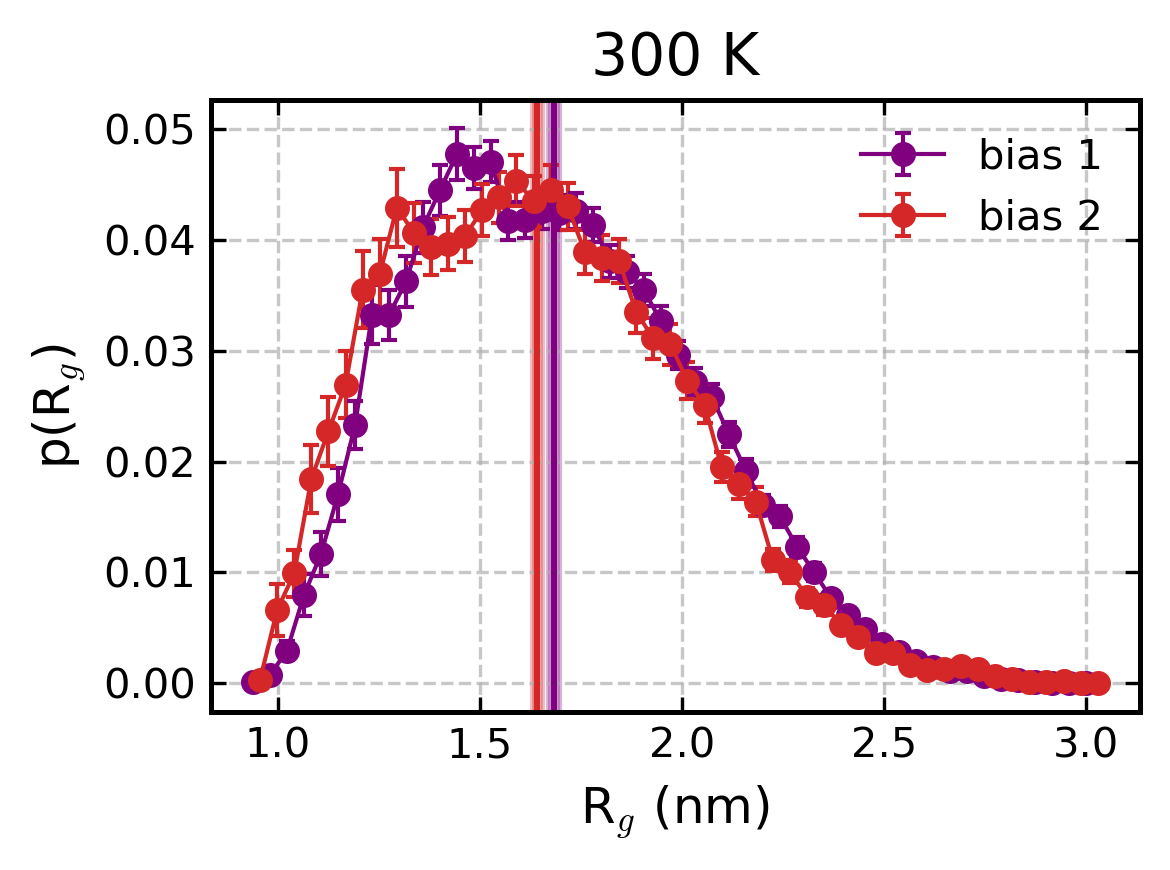

In [3]:
# Rg distribution at 300 K (avg ± std_err)



# load data
dfshared = pd.read_csv('plots_fragmentACTR/300K_prob_Rg_300K.csv')
dfother = pd.read_csv('plots_fragmentACTR_otherbiases/300K_prob_Rg_300K.csv')


# plot PMF with blocking error bars
plt.figure(figsize = (4,3))
plt.title(f"300 K")
plt.errorbar(dfshared['Rg (nm)'], dfshared['p(Rg)'], yerr=dfshared['±'], fmt='o-', markersize=5, capsize=2, linewidth=1., elinewidth=1., color='purple', label = 'bias 1')
plt.errorbar(dfother['Rg (nm)'], dfother['p(Rg)'], yerr=dfother['±'], fmt='o-', markersize=5, capsize=2, linewidth=1., elinewidth=1., color='tab:red', label = 'bias 2')
plt.xlabel("R$_g$ (nm)")
plt.ylabel("p(R$_g$)")

# load and plot the average rg
avg1 = pd.read_csv('plots_fragmentACTR/300K_Rg_at_300K.csv')
avg2 = pd.read_csv('plots_fragmentACTR_otherbiases/300K_Rg_at_300K.csv')

plt.axvline(avg1['Rg (nm)'][0], color = 'purple', linewidth=1.5)
plt.axvspan(avg1['Rg (nm)'][0]-avg1['±'][0],avg1['Rg (nm)'][0]+avg1['±'][0], color = 'purple', alpha=0.3)
plt.axvline(avg2['Rg (nm)'][0], color = 'tab:red', linewidth=1.5)
plt.axvspan(avg2['Rg (nm)'][0]-avg2['±'][0],avg2['Rg (nm)'][0]+avg2['±'][0], color = 'tab:red', alpha=0.3)

plt.legend()
plt.tight_layout()
plt.savefig(output_path+f"{prod_name}_prob_Rg_300K.pdf")

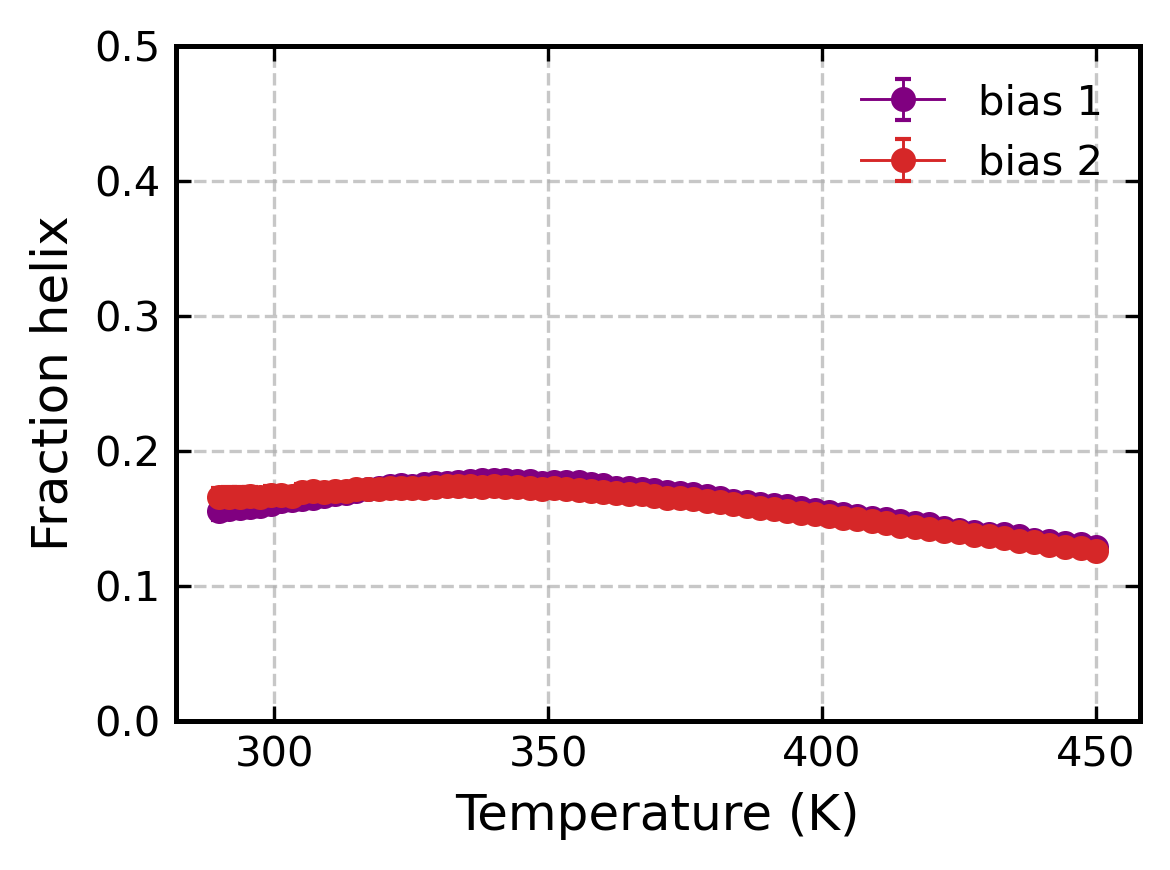

In [4]:
# Helical fraction as a function of temperature from DSSP (H, G, I)

# load data
dfshared = pd.read_csv('plots_fragmentACTR/300K_HelicalFrac_vs_Temp.csv')
dfother = pd.read_csv('plots_fragmentACTR_otherbiases/300K_HelicalFrac_vs_Temp.csv')

plt.figure(figsize = (4,3))
plt.errorbar(dfshared['T (K)'], dfshared['Helix (%)'], dfshared['±'], fmt='o-', color = 'purple', capsize = 2, markersize = 5, linewidth=0.7, elinewidth=0.7, label = 'bias 1')
plt.errorbar(dfother['T (K)'], dfother['Helix (%)'], dfother['±'], fmt='o-', color = 'tab:red', capsize = 2, markersize = 5, linewidth=0.7, elinewidth=0.7, label = 'bias 2')
plt.xlabel('Temperature (K)')
plt.ylabel('Fraction helix')
plt.ylim(0, 0.5)
plt.legend()
plt.tight_layout()
plt.savefig(output_path+f"{prod_name}_HelicalFrac_vs_Temp.pdf")

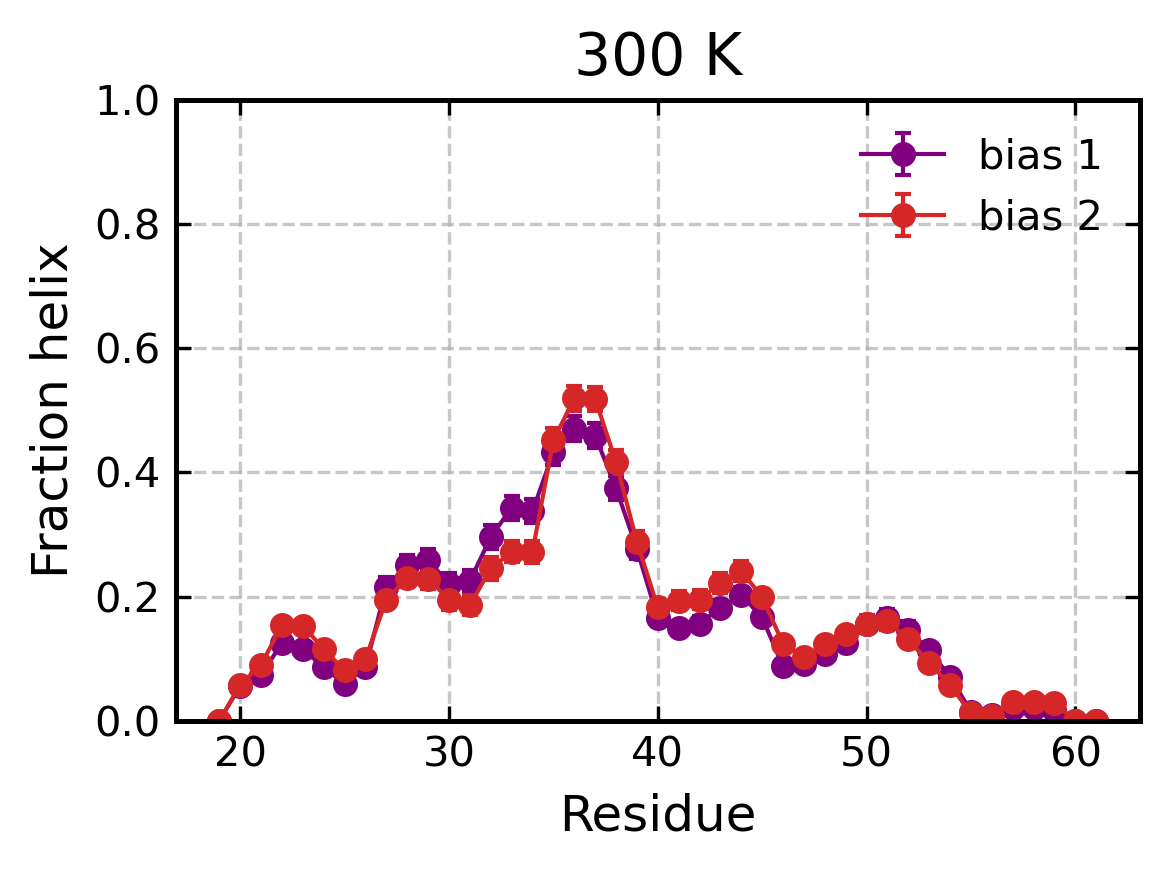

In [5]:
# Helicity at 300 K

# save data
dfshared = pd.read_csv('plots_fragmentACTR/300K_perres_helicity_300K.csv')
dfother = pd.read_csv('plots_fragmentACTR_otherbiases/300K_perres_helicity_300K.csv')

# plot PMF with blocking error bars
plt.figure(figsize = (4,3))
plt.title(f"300 K")
plt.errorbar(dfshared['Residue'], dfshared['Fraction helix'], yerr=dfshared['±'], fmt='o-', markersize=5, capsize=2, linewidth=1., elinewidth=1., color='purple', label = 'bias 1')
plt.errorbar(dfother['Residue'], dfother['Fraction helix'], yerr=dfother['±'], fmt='o-', markersize=5, capsize=2, linewidth=1., elinewidth=1., color='tab:red', label = 'bias 2')
plt.xlabel("Residue")
plt.ylabel("Fraction helix")
plt.ylim(0,1)
plt.legend()
plt.tight_layout()
plt.savefig(output_path+f"{prod_name}_perres_helicity_300K.pdf")

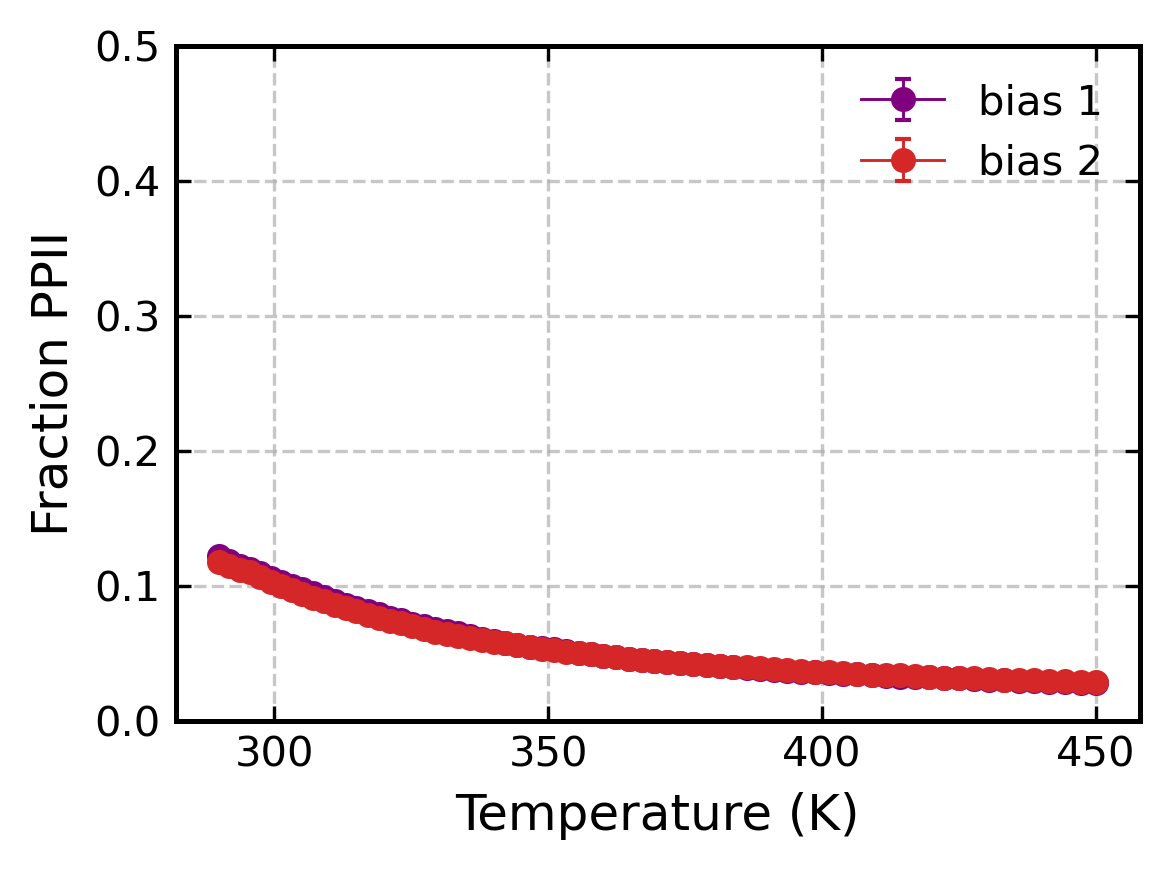

In [6]:
# Helical fraction as a function of temperature from DSSP (H, G, I)

# load data
dfshared = pd.read_csv('plots_fragmentACTR/300K_PPIIFrac_vs_Temp.csv')
dfother = pd.read_csv('plots_fragmentACTR_otherbiases/300K_PPIIFrac_vs_Temp.csv')

plt.figure(figsize = (4,3))
plt.errorbar(dfshared['T (K)'], dfshared['Helix (%)'], dfshared['±'], fmt='o-', color = 'purple', capsize = 2, markersize = 5, linewidth=0.7, elinewidth=0.7, label = 'bias 1')
plt.errorbar(dfother['T (K)'], dfother['Helix (%)'], dfother['±'], fmt='o-', color = 'tab:red', capsize = 2, markersize = 5, linewidth=0.7, elinewidth=0.7, label = 'bias 2')
plt.xlabel('Temperature (K)')
plt.ylabel('Fraction PPII')
plt.ylim(0, 0.5)
plt.legend()
plt.tight_layout()
plt.savefig(output_path+f"{prod_name}_PPIIFrac_vs_Temp.pdf")

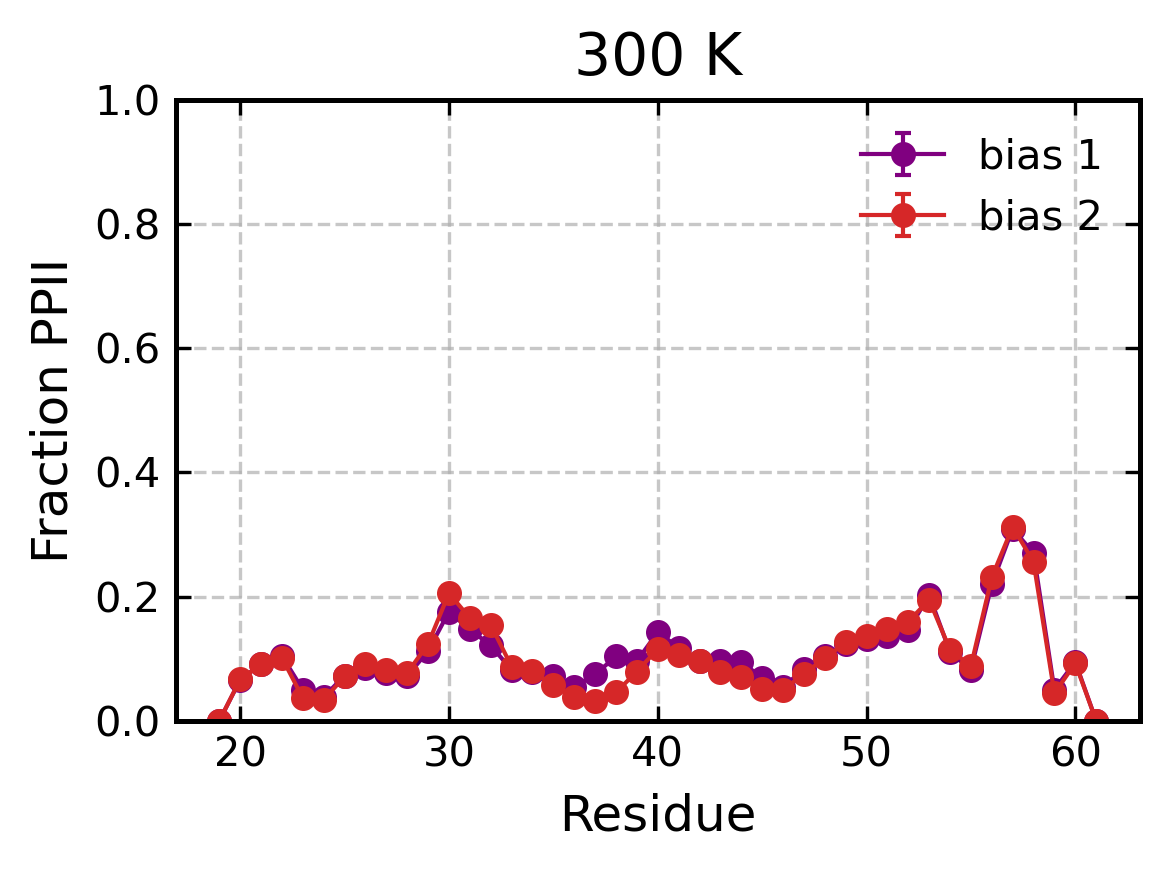

In [7]:
# PPII at 300 K

# save data
dfshared = pd.read_csv('plots_fragmentACTR/300K_perres_PPII_300K.csv')
dfother = pd.read_csv('plots_fragmentACTR_otherbiases/300K_perres_PPII_300K.csv')

# plot PMF with blocking error bars
plt.figure(figsize = (4,3))
plt.title(f"300 K")
plt.errorbar(dfshared['Residue'], dfshared['Fraction helix'], yerr=dfshared['±'], fmt='o-', markersize=5, capsize=2, linewidth=1., elinewidth=1., color='purple', label = 'bias 1')
plt.errorbar(dfother['Residue'], dfother['Fraction helix'], yerr=dfother['±'], fmt='o-', markersize=5, capsize=2, linewidth=1., elinewidth=1., color='tab:red', label = 'bias 2')
plt.xlabel("Residue")
plt.ylabel("Fraction PPII")
plt.ylim(0,1.)
plt.legend()
plt.tight_layout()
plt.savefig(output_path+f"{prod_name}_perres_PPII_300K.pdf")